# World Bank Data

In this project I will use my recently-gained skills of writing user-defined functions, iterators, list comprehensions and generatos to wrangle and extract meaningful information from a real-world dataset: the World Bank Development Indicators dataset. This dataset contains data on 217 world economies for over half a century, from 1960 up until 2015

In [1]:
#Importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define plot_pop()
def plot_pop(filename, country_code):
    # Initialize reader object
    urb_pop_reader = pd.read_csv(filename, chunksize=1000)
    
    # Initialize empty DataFrame
    data = pd.DataFrame()
    
    # Iterate over each DataFrame chunk
    for df_urb_pop in urb_pop_reader:
        # Check out specific country: df_pop_ceb
        df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == country_code]

        # Zip DataFrame columns of interest: pops
        pops = zip(df_pop_ceb['Total Population'], df_pop_ceb['Urban population (% of total)'])

        # Turn zip object into list: pops_list
        pops_list = list(pops)

        # Use list comprehension to create new DataFrame column 'Total Urban Population'
        df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]

        # Append DataFrame chunk to data: data
        data = data.append(df_pop_ceb)

    # Plot urban population data
    data.plot(kind='scatter', x='Year', y='Total Urban Population')
    plt.show() 

In [3]:
# Set the filename: fn
fn = 'WorldBank.csv'

<ipython-input-2-11f5949ade77>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]


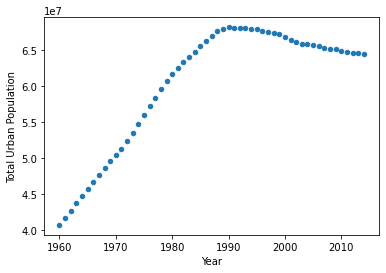

In [4]:
# Call plot_pop for country code 'CEB'
plot_pop(fn, 'CEB')

<ipython-input-2-11f5949ade77>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]


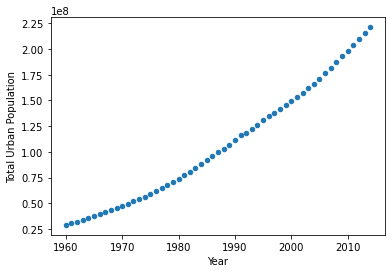

In [5]:
# Call plot_pop for country code 'ARB'
plot_pop(fn, 'ARB')